# **IMPORTING LIBRARIES**

In [151]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA LOADING AND CLEANING:**

In [152]:
df= pd.read_csv("RTA Dataset.csv")

In [153]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [154]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [155]:
df['Time']=pd.to_datetime(df['Time'],errors='coerce')

/tmp/ipython-input-2772653026.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'],errors='coerce')


In [156]:
Day_map={"Monday":1, "Tuesday" :2, "Wednesday" : 3, "Thursday"  : 4, "Friday":5,"Saturday":6, "Sunday": 7}
df['Day_of_week_in_number']=  df['Day_of_week'].map(Day_map)

In [157]:
df.dtypes

,0
Time,datetime64[ns]
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [158]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_in_number
count,12316,12316.000000,12316.000000,12316.000000
mean,2025-11-27 14:17:50.768106496,2.040679,1.548149,3.947304
min,2025-11-27 00:01:00,1.000000,1.000000,1.000000
25%,2025-11-27 10:31:00,2.000000,1.000000,2.000000
50%,2025-11-27 15:10:00,2.000000,1.000000,4.000000
75%,2025-11-27 18:10:00,2.000000,2.000000,6.000000
max,2025-11-27 23:59:00,7.000000,8.000000,7.000000
std,NaN,0.688790,1.007179,1.931065


In [159]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [160]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

In [161]:
col_fillna=[
    'Vehicle_driver_relation','Driving_experience','Owner_of_vehicle','Lanes_or_Medians','Road_allignment',
    'Road_surface_type','Type_of_collision','Area_accident_occured','Type_of_vehicle','Types_of_Junction','Defect_of_vehicle',
    'Service_year_of_vehicle','Fitness_of_casuality','Educational_level','Vehicle_movement']
for i in col_fillna:
  df[i].fillna(df[i].mode()[0],inplace =True)
#df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0], inplace=True)


/tmp/ipython-input-1456307419.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace =True)


In [162]:
df.drop(columns=['Work_of_casuality'], inplace=True)

In [163]:
df.isna().sum()


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


# **DATA VISUALIZATION:**

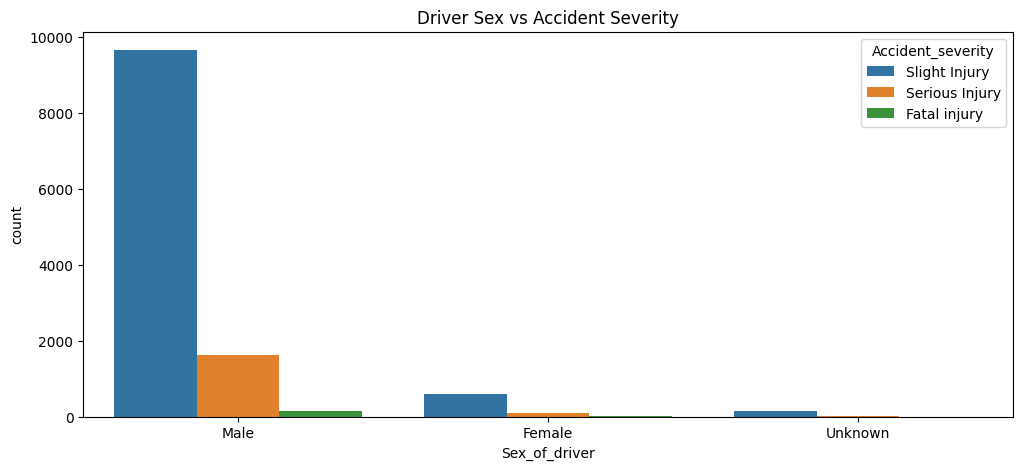

In [164]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Sex_of_driver', hue='Accident_severity')
plt.title("Driver Sex vs Accident Severity")
plt.show()

/tmp/ipython-input-3641302926.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df, palette=['skyblue','orange'])


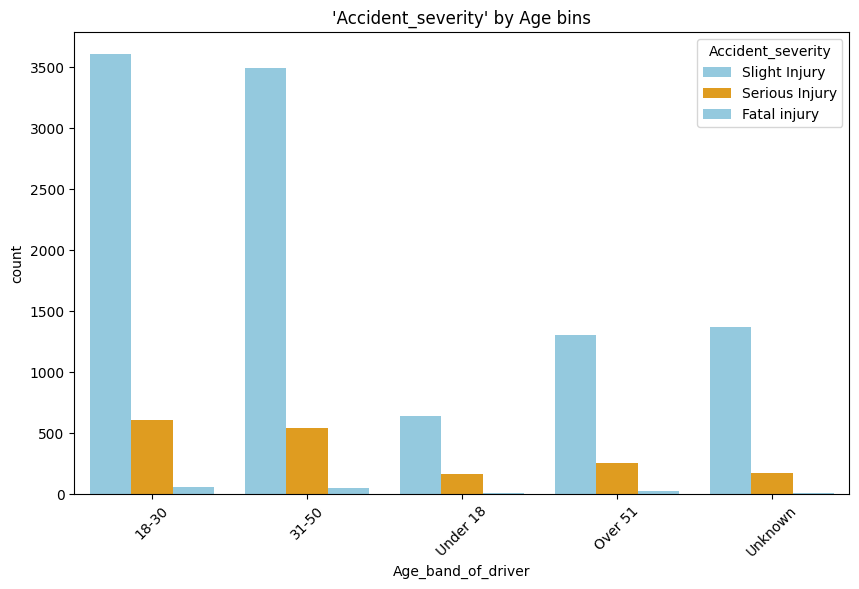

In [165]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df, palette=['skyblue','orange'])
plt.xticks(rotation=45)
plt.title("'Accident_severity' by Age bins")
plt.show()

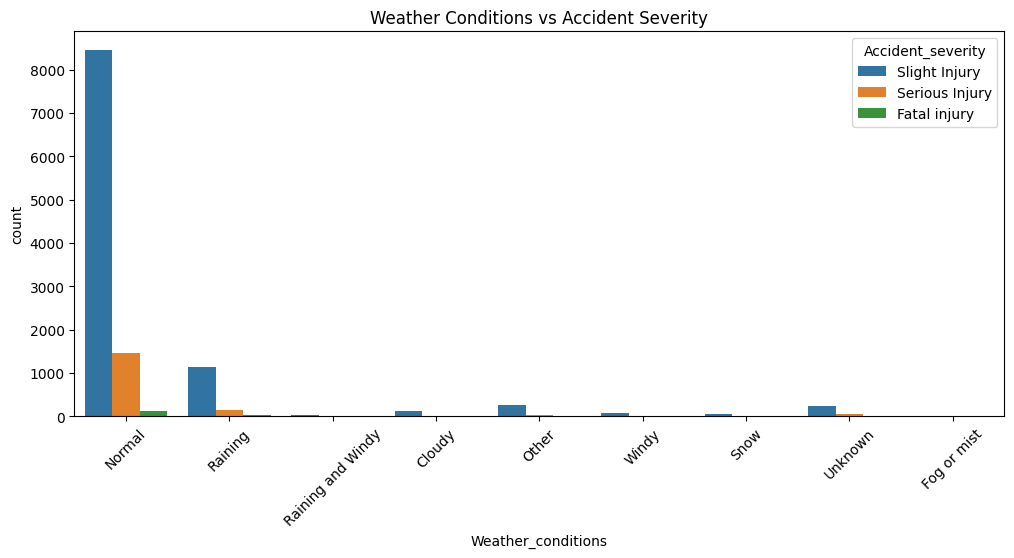

In [166]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Weather_conditions', hue='Accident_severity')
plt.title("Weather Conditions vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

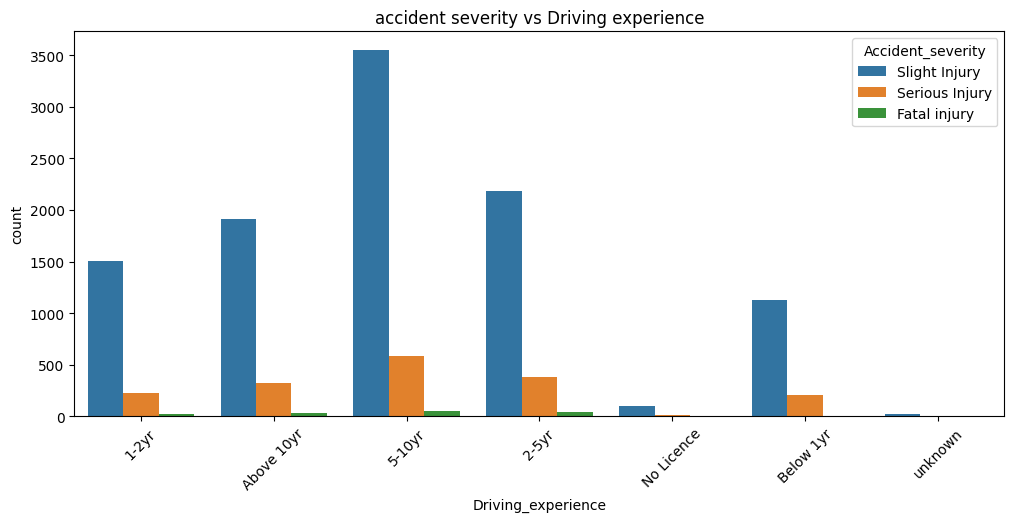

In [167]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Driving_experience', hue='Accident_severity')
plt.title("accident severity vs Driving experience")
plt.xticks(rotation=45)
plt.show()


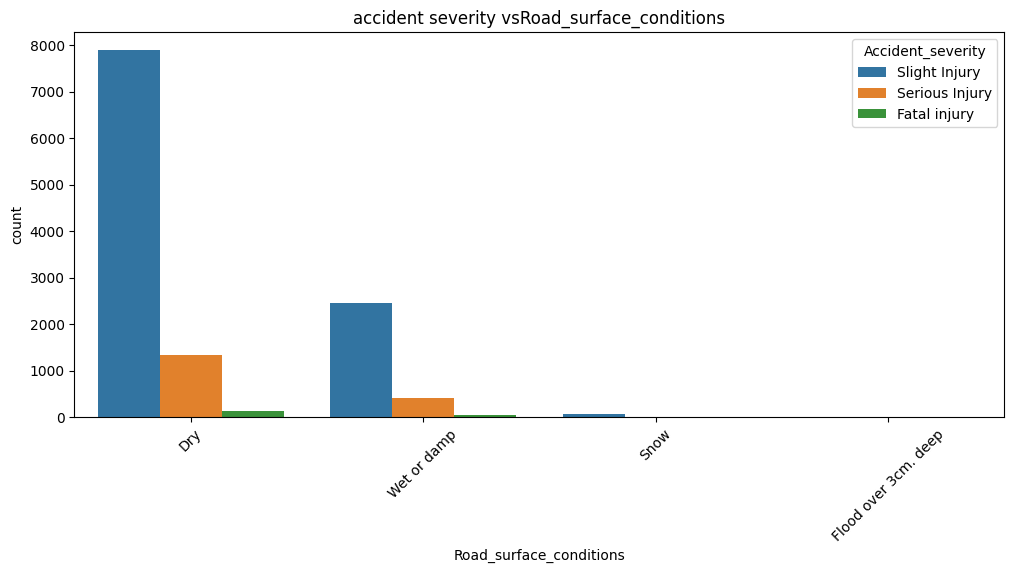

In [168]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Road_surface_conditions', hue='Accident_severity')
plt.title("accident severity vsRoad_surface_conditions")
plt.xticks(rotation=45)
plt.show()

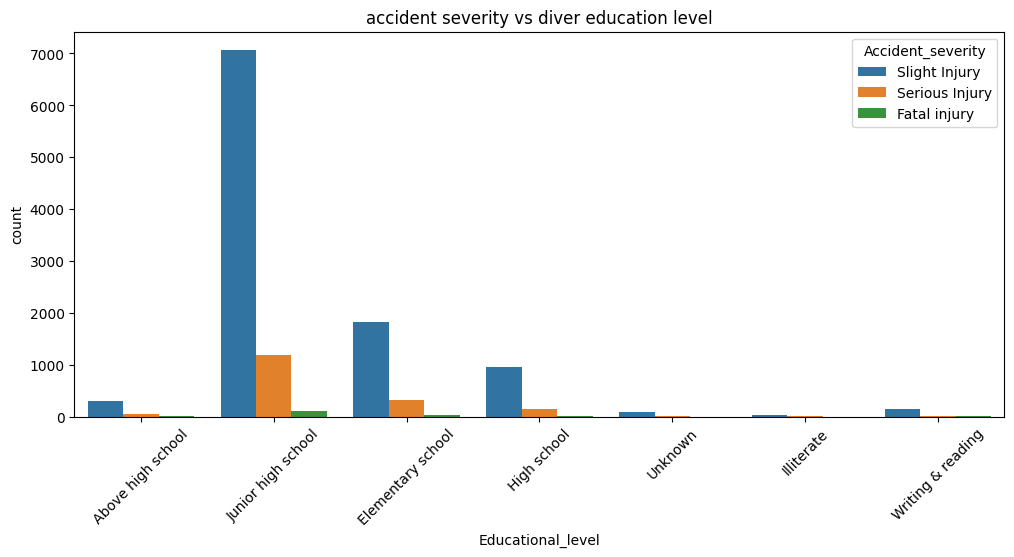

In [169]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Educational_level', hue='Accident_severity')
plt.title("accident severity vs diver education level")
plt.xticks(rotation=45)
plt.show()

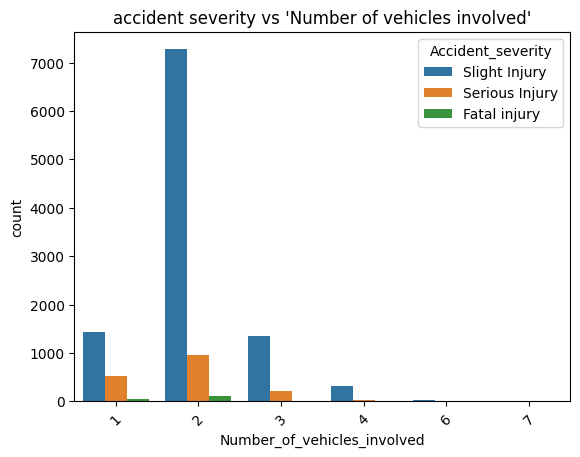

In [170]:
# plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Number_of_vehicles_involved', hue='Accident_severity')
plt.title("accident severity vs 'Number of vehicles involved'")
plt.xticks(rotation=45)
plt.show()

# **DATA PROCESSING**

In [171]:
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [172]:
corr = df.corr()
print((corr['Accident_severity'].sort_values(ascending=False))*100)


Accident_severity              100.000000
Number_of_vehicles_involved      9.602299
Type_of_collision                2.586710
Light_conditions                 2.574060
Age_band_of_casualty             2.551026
Casualty_class                   1.407511
Age_band_of_driver               1.318453
Pedestrian_movement              1.308204
Weather_conditions               1.017161
Cause_of_accident                0.804030
Casualty_severity                0.653065
Sex_of_driver                    0.497652
Road_surface_conditions          0.457886
Sex_of_casualty                  0.370759
Defect_of_vehicle                0.188857
Driving_experience               0.050853
Service_year_of_vehicle          0.039310
Educational_level               -0.147069
Day_of_week                     -0.273032
Type_of_vehicle                 -0.370863
Road_surface_type               -0.450970
Road_allignment                 -0.596719
Types_of_Junction               -0.886144
Vehicle_movement                -1

In [173]:
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df.drop(columns=['Time'], inplace=True)


# **MODEL IMPLEMENTATION:**

In [174]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

Minute                         0.089156
Hour                           0.082507
Cause_of_accident              0.063031
Type_of_vehicle                0.053988
Area_accident_occured          0.047425
Driving_experience             0.044020
Day_of_week_in_number          0.042219
Day_of_week                    0.042210
Number_of_vehicles_involved    0.042135
Lanes_or_Medians               0.039821
Age_band_of_driver             0.039046
Vehicle_movement               0.037108
Service_year_of_vehicle        0.034921
Number_of_casualties           0.034726
Types_of_Junction              0.031593
Educational_level              0.029674
Age_band_of_casualty           0.028844
Type_of_collision              0.026738
Road_allignment                0.021523
Casualty_class                 0.020925
Weather_conditions             0.018891
Sex_of_casualty                0.018268
Light_conditions               0.017425
Road_surface_conditions        0.015419
Vehicle_driver_relation        0.014714


In [175]:
drop_cols=['Sex_of_driver', 'Owner_of_vehicle', 'Fitness_of_casuality', 'Defect_of_vehicle',
           'Casualty_severity','Road_surface_type'
]

In [176]:
#overfitting or data leakage occurred,so commenting to check behaviour without this
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X = df.drop(['Accident_severity'] + drop_cols, axis=1)
# y = df['Accident_severity']
# X_res, y_res = smote.fit_resample(X, y)


In [177]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Accident_severity'] + drop_cols, axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [178]:
print(X.columns)


Index(['Day_of_week', 'Age_band_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Service_year_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Pedestrian_movement', 'Cause_of_accident',
       'Day_of_week_in_number', 'Hour', 'Minute'],
      dtype='object')


In [179]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-score of random forest:", f1)

Weighted F1-score of random forest: 0.7910639180225333


In [180]:
xgb_model= xgb.XGBClassifier(n_estimators=200,max_depth=6,learning_rate=0.1,objective='multi:softmax')
xgb_model.fit(X_train_res, y_train_res)
y_pred = xgb_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-score by xgb model:", f1)

Weighted F1-score by xgb model: 0.7987971869599264


In [181]:
lr_model=LogisticRegression(max_iter=500, n_jobs=-1)
lr_model.fit(X_train_res, y_train_res)
y_pred = lr_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-score by Logistic Regression model:", f1)

Weighted F1-score by Logistic Regression model: 0.6463330757824318


In [182]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [183]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.1, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train_res)
y_pred = svm_model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-score by svm model:", f1)

Weighted F1-score by svm model: 0.777530961576692


In [184]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_res, y_train_res)
y_pred = knn_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-score by knn model:", f1)

Weighted F1-score by knn model: 0.5593824813439413
